In [2]:
# DBSCAN Clustering
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise),
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
x = dataset.iloc[:, [3, 4]].values

In [13]:
#x

In [16]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(x)
clustering.labels_


array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [17]:
clustering

DBSCAN(eps=3, min_samples=2)

Estimated number of clusters: 31


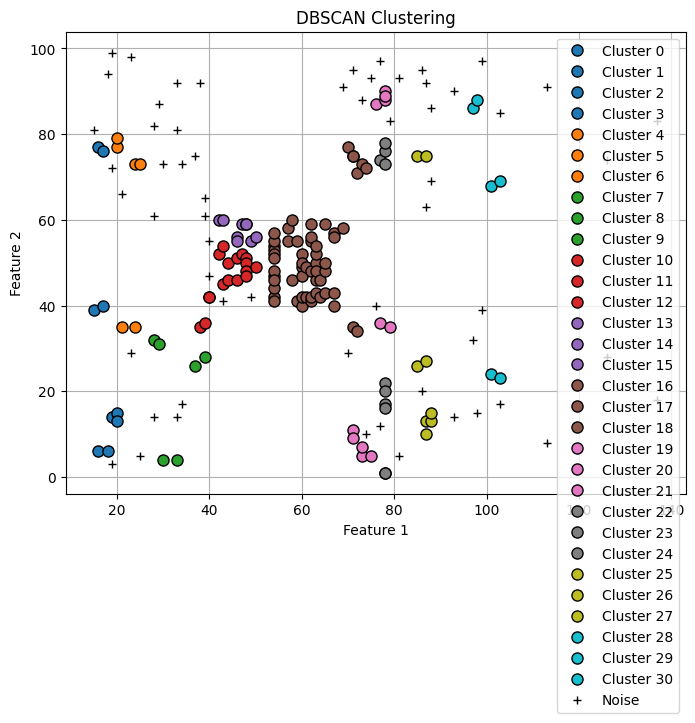

In [18]:
labels = clustering.labels_
# Step 3: Identify number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters}")

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))

# Unique labels (including -1 for noise)
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    xy = x[class_member_mask]
    
    if k == -1:
        # Noise points in black
        plt.plot(xy[:, 0], xy[:, 1], 'k+', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=8, label=f'Cluster {k}')
        
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
unsupervised=pd.DataFrame(dataset)

In [20]:
unsupervised['Cluster_group']=labels

In [21]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


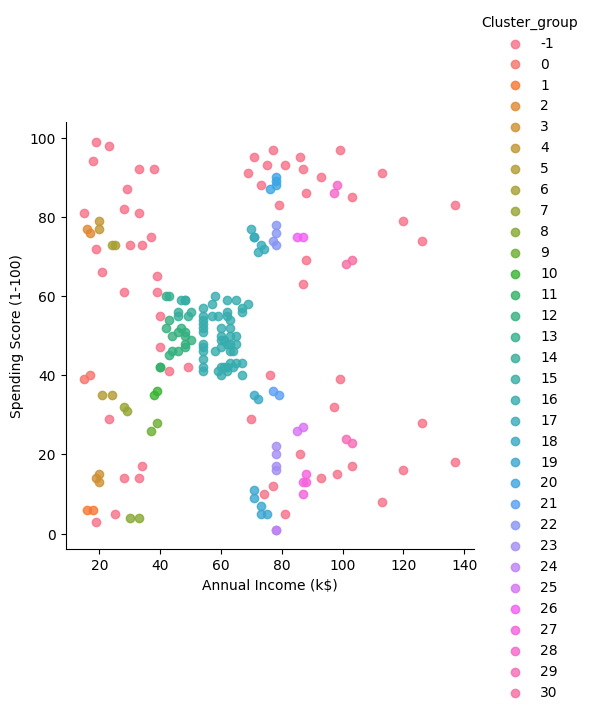

In [22]:
import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [12]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
score = silhouette_score(x,labels)
print("Silhouette Score:" , score)

Silhouette Score: 0.06815381140609145
